# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')
data.shape

(4870, 65)

In [3]:
# number of callbacks for black-sounding names
print('Number of callbacks for black-sounding names: ' + str(sum(data[data.race=='b'].call)))
print('Number of callbacks for white-sounding names: ' + str(sum(data[data.race=='w'].call)))

Number of callbacks for black-sounding names: 157.0
Number of callbacks for white-sounding names: 235.0


In [4]:
data.columns


Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [6]:
data['race'].value_counts()

w    2435
b    2435
Name: race, dtype: int64

# Solution to Q1, Q2 here: 
Since we don't population standard deviation, then we can use the t test. ')
There is no mention if this was a simple random sample, so that can be assumed. 
Also, both n*p and n(1-p) is at least 5, and the sample is less than 10%of the total population, therefore CLT is relevant.

Step 1: 

H0: Number of callbacks for black candidates is equal to number of callbacks for white candidates

H1: Number of callbacks for black candidates is not equal to number of callbacks for white candidates

In [7]:
w = data[data.race=='w']
b = data[data.race=='b']

w_total = w.race.str.contains('w').sum()
b_total = b.race.str.contains('b').sum()
print(w_total)
print(b_total)


2435
2435


In [8]:
b_call = sum(data[data.race=='b'].call)
w_call = sum(data[data.race=='w'].call)

In [9]:
# Your solution to Q3 here
# Bootstrep method
white_cb = data[data.race == 'w'].call.values
black_cb = data[data.race == 'b'].call.values

diff_of_means = np.mean(white_cb) - np.mean(black_cb)

perm_replicates = np.empty(10000)
for i in range(10000):
    samples = np.random.permutation(np.concatenate((white_cb, black_cb)))
    white_samples = samples[:len(white_cb)]
    black_samples = samples[len(white_cb):]
    perm_replicates[i] = abs(np.mean(white_samples) - np.mean(black_samples))
p = np.sum(perm_replicates > diff_of_means) / len(perm_replicates)

print('p-val: ', p)
conf_int = np.percentile(perm_replicates, [2.5, 97.5])
stdev = statistics.stdev(perm_replicates)

print('95% confidence interval: ', conf_int, 'call back ratio difference')
print('Standard deviation of sample is % s' % stdev)
print('Margin of Error: ' + str((1.96 * stdev) / 100))

p-val:  0.0
95% confidence interval:  [0.         0.01724846] call back ratio difference
Standard deviation of sample is 0.0046992362551257424
Margin of Error: 9.210503060046456e-05


In [10]:
# 2 sample proportions z-test (frequentist method)


print('Step 3: Compute the statistical test: Two proportion z-test')
z_score, p_value = sm.stats.proportions_ztest([w_call, b_call], [w_total, b_total])
print('z score: ' + str(z_score) + '\np value: ' + str(p_value))
print('Step 4: Formulate the Decision Rule - if Z score falls between and -1.96 and 1.96, the null hypothesis is not rejected')
print('Step 5: Make a decision: Since p value is below significance value and z score is out of the -1.96 and 1.96 range, null hypothesis is rejected. ')

Step 3: Compute the statistical test: Two proportion z-test
z score: 4.108412152434346
p value: 3.983886837585077e-05
Step 4: Formulate the Decision Rule - if Z score falls between and -1.96 and 1.96, the null hypothesis is not rejected
Step 5: Make a decision: Since p value is below significance value and z score is out of the -1.96 and 1.96 range, null hypothesis is rejected. 


In [11]:
#Tells us critical value at 95% confidence is
norm.ppf(1-(0.05/2))

1.959963984540054

In [12]:
data['race'] = data.race.replace(to_replace=['w', 'b'], value=[0, 1])


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>

Is race a factor in whether a job candidate gets a call back for an interview? 
Based on the significance of our z-score: 0.9999800805658121 and our z-score of 4.11 which exceeds our critical value at 
95% confidence of 1.96, the answer is we can clearly reject the null hypothesis that race had no effect on whether a candidate was called back for an interview.


C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Spearmans correlation coefficient: -0.059
Comment count and views are correlated (reject H0) p=0.000


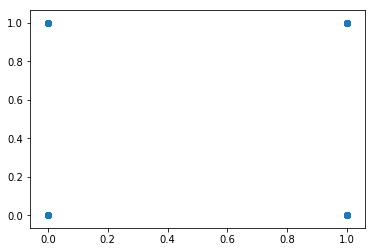

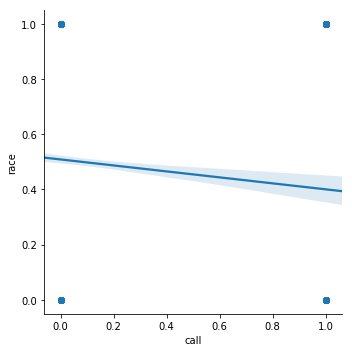

In [13]:
#Answer to Question # 4 - write a story to describe statistical significance 

print('Is race a factor in whether a job candidate gets a call back for an interview? ')

print('Based on the significance of our z-score: ' +str(norm.cdf(z_score)) + ' and our z-score of 4.11 which exceeds our critical value at \n95% confidence of 1.96, the answer is we can clearly reject the null hypothesis that race had no effect on whether a candidate was called back for an interview.')

plt.scatter(data['call'], data['race'])
sns.lmplot(x='call', y='race', data=data)

coef, p = spearmanr(data['call'], data['race'])

print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Comment count and views are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Comment count and views are correlated (reject H0) p=%.3f' % p)

In [14]:
# 5 - let's have some fun w/ machine learning and look at a GBM w/ feature importance



In [15]:
from sklearn.model_selection import train_test_split

data.fillna(method='ffill')

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit
5,b,1,4,2,6,1,0,0,0,266,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Private
6,b,1,4,2,5,0,1,0,0,13,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Private
7,b,1,3,4,21,0,1,0,1,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit
8,b,1,4,3,3,0,0,0,0,316,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Private
9,b,1,4,2,6,0,1,0,0,263,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Private


In [16]:
a=data['id']
b=data['firstname']
c=data['kind']
d=data['expminreq']
e= data['schoolreq']
f = data['ownership']

In [17]:
#First deal with dummies
just_dummies = pd.get_dummies(data[['id','ad','firstname','kind','expminreq','schoolreq','ownership', 'sex', 'city']])
data = pd.concat([data, just_dummies], axis=1)      
data.drop(['id','ad','firstname','kind','expminreq','schoolreq','ownership', 'sex', 'city'], inplace=True, axis=1)

Y = data['call']
X = data.drop('call', axis=1)



In [18]:
X = X.fillna(0)
Y = Y.fillna(0)

null_columns=X.columns[X.isnull().any()]
X[null_columns].isnull().sum()

print(X[X.isnull().any(axis=1)][null_columns].head())



Empty DataFrame
Columns: []
Index: []


In [19]:


X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=.9, random_state=0)

C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [21]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [22]:
from sklearn.metrics import mean_squared_error

print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting R squared": 0.9240
Gradient Boosting RMSE: 0.2756


In [23]:
# Use random grid to see if we can optimize performance
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [24]:
from sklearn.model_selection import GridSearchCV

# Tune hyper parameters using random search to see if we can gain any improvement
gbm_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
gbm_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 25.2min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
         

In [25]:
#Print and evaluate best parameters from the search
print(gbm_random.best_params_)

best_random = gbm_random.best_estimator_

{'n_estimators': 733, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 7}


In [26]:
random_model = GradientBoostingClassifier(n_estimators = 944, min_samples_split=10, min_samples_leaf=1, 
                                   max_features = 'sqrt', max_depth = 6, random_state = 42)

In [27]:
random_model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=944,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [28]:
#Evaluate performance of GBM with random searched hyperparameters
print('GBM - random searched R squared: %.4f' % random_model.score(X_test, y_test))
y_pred = random_model.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('GBM - random searched RMSE: %.4f' % forest_rmse)

GBM - random searched R squared: 0.9281
GBM - random searched RMSE: 0.2681


Accuracy of the GBM on test set: 0.928
             precision    recall  f1-score   support

        0.0       0.94      0.99      0.96       445
        1.0       0.68      0.31      0.43        42

avg / total       0.92      0.93      0.92       487



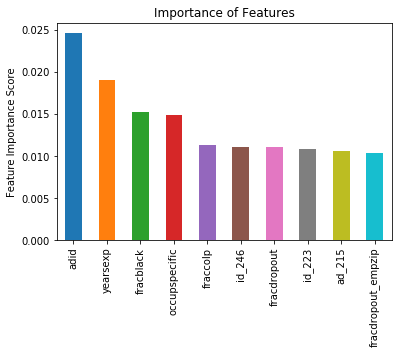

In [29]:
predictors=list(X_train)
feat_imp = pd.Series(random_model.feature_importances_, predictors).sort_values(ascending=False)
top10 = feat_imp.head(10)
top10.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(random_model.score(X_test, y_test)))
pred=random_model.predict(X_test)
print(classification_report(y_test, pred))

In [30]:
print('In Summary, we had a very impressive model with GBM.  It turns out race is not the most important feature to determine callback of a candidate. If we knew the definition of these features, a user could make an informed decision regarding which top 10 features are most important in determining whether a candidate is called back for an interview.')
print('Also, there could be features that are not in the data that would be in determining callback such as: \ncriminal record \ncredit history, etc.')

In Summary, we had a very impressive model with GBM.  It turns out race is not the most important feature to determine callback of a candidate. If we knew the definition of these features, a user could make an informed decision regarding which top 10 features are most important in determining whether a candidate is called back for an interview.
Also, there could be features that are not in the data that would be in determining callback such as: 
criminal record 
credit history, etc.
